In [25]:
#Import required libraries
import pandas as pd
import numpy as np

### Reading data into a dataframe named df, a copy is made later and saved as data. We will work on dataframe data leaving df untouched.

In [26]:
#Read the data and save it in a dataframe called df
df = pd.read_csv("./Data/New_Price_Change_Monitoring_System.csv")

#read the first 5 rows
df.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [27]:
#Make a copy and save it as data. we will work on data, and leave df as the original untouched dataframe.
data=df.copy()
data.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [28]:
#check the number of rows and columns
data.shape

(1999, 13)

In [29]:
#Check for missing values, datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_scraped      1999 non-null   object 
 1   page_number       1999 non-null   int64  
 2   product_url       1999 non-null   object 
 3   image             1999 non-null   object 
 4   current_price     1999 non-null   object 
 5   title             1999 non-null   object 
 6   brand             0 non-null      float64
 7   original_price    1798 non-null   object 
 8   discount          1798 non-null   object 
 9   verified_ratings  1549 non-null   object 
 10  rating_number     1999 non-null   float64
 11  seller            1999 non-null   object 
 12  main_category     1999 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 203.1+ KB


In [30]:
#Drop brand since the column is empty
data = data.drop(columns=['brand'], errors='ignore')
data.shape

(1999, 12)

### Data Cleaning

In [31]:
# 2. Clean current_price & original_price. make them numeric
def clean_price(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace("KSh", "").replace(",", "").strip()
    if "-" in x:  # handle ranges like "699 - 729" It will take the average of the two
        parts = x.split("-")
        nums = [float(p.strip()) for p in parts if p.strip().replace('.', '', 1).isdigit()]
        return np.mean(nums) if nums else np.nan
    return float(x) if x.replace('.', '', 1).isdigit() else np.nan

data['current_price'] = data['current_price'].apply(clean_price)
data['original_price'] = data['original_price'].apply(clean_price)
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [32]:
#Clean discount, remove %
data['discount'] = data['discount'].str.replace('%', '', regex=False)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


In [33]:
#Clean verified_ratings. Extract numeric value from the sring.
data['verified_ratings'] = (
    data['verified_ratings']
    .str.extract(r'(\d+)')
    .astype(float)
)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


### Handling Missing Values

In [34]:
#Recheck missing values
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price      201
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [35]:
# For original_price, the missing value is set equal to current_price (assume no discount)
data['original_price'] = data['original_price'].fillna(data['current_price'])
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [36]:
# Discount, we filled missing values with 0
data['discount'] = data['discount'].fillna(0)
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount              0
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [37]:
# verified_ratings, missing = 0
data['verified_ratings'] = data['verified_ratings'].fillna(0)
data.isna().sum()

date_scraped        0
page_number         0
product_url         0
image               0
current_price       0
title               0
original_price      0
discount            0
verified_ratings    0
rating_number       0
seller              0
main_category       0
dtype: int64

### Handling Duplicates in column product_url

In [38]:
if 'product_url' in data.columns:
    # Count product_url occurrences
    url_counts = data['product_url'].value_counts()

    # Keep only duplicates
    dupes = url_counts[url_counts > 1]

    # Convert to DataFrame for the same look as before
    dupes_df = dupes.reset_index()
    dupes_df.columns = ['product_url', 'url_count']

    # Show top 10 duplicate products
    print(dupes_df.head(20))

                                          product_url  url_count
0   https://www.jumia.co.ke/derma-roller-for-beard...          3
1   https://www.jumia.co.ke/tecno-spark-40-6.67dis...          2
2   https://www.jumia.co.ke/whiteboard-90cmx60cm-2...          2
3   https://www.jumia.co.ke/healthy-manual-breast-...          2
4   https://www.jumia.co.ke/xiaomi-redmi-14c-6.88-...          2
5   https://www.jumia.co.ke/generic-yyk790-anc-sle...          2
6   https://www.jumia.co.ke/epson-ecotank-l3250-a4...          2
7   https://www.jumia.co.ke/generic-36-pieces-simu...          2
8   https://www.jumia.co.ke/fashion-student-backpa...          2
9   https://www.jumia.co.ke/ramtons-coffee-maker-r...          2
10  https://www.jumia.co.ke/3-in-1-rechargeable-ho...          2
11  https://www.jumia.co.ke/xiaomi-redmi-15c-6.9up...          2
12  https://www.jumia.co.ke/generic-led-2.4g-recha...          2
13  https://www.jumia.co.ke/alagzi-mens-2024-new-f...          2
14  https://www.jumia.co.

In [39]:
# Count duplicates based on product_url
if 'product_url' in data.columns:
    print(data.duplicated(subset=['product_url']).sum())

94


In [40]:
# Drop duplicate product URLs (keep the first occurrence)
if 'product_url' in data.columns:
    data = data.drop_duplicates(subset=['product_url'], keep='first')
data.shape

(1905, 12)

In [41]:
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33,523.0,4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48,2092.0,3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53,734.0,4.2,Waanzilish,Fashion


## Expolatory Data Analysis

### Pricing vs Ratings.

Why it matters.

It is crucial because it shows whether higher prices actually translate into higher customer satisfaction. In E-commerce, this insight helps sellers balance competitive pricing with perceived value — proving that success isn’t just about lowering prices, but about finding the sweet spot where customers feel they’re getting both quality and affordability.

Correlation between price and rating: -0.04


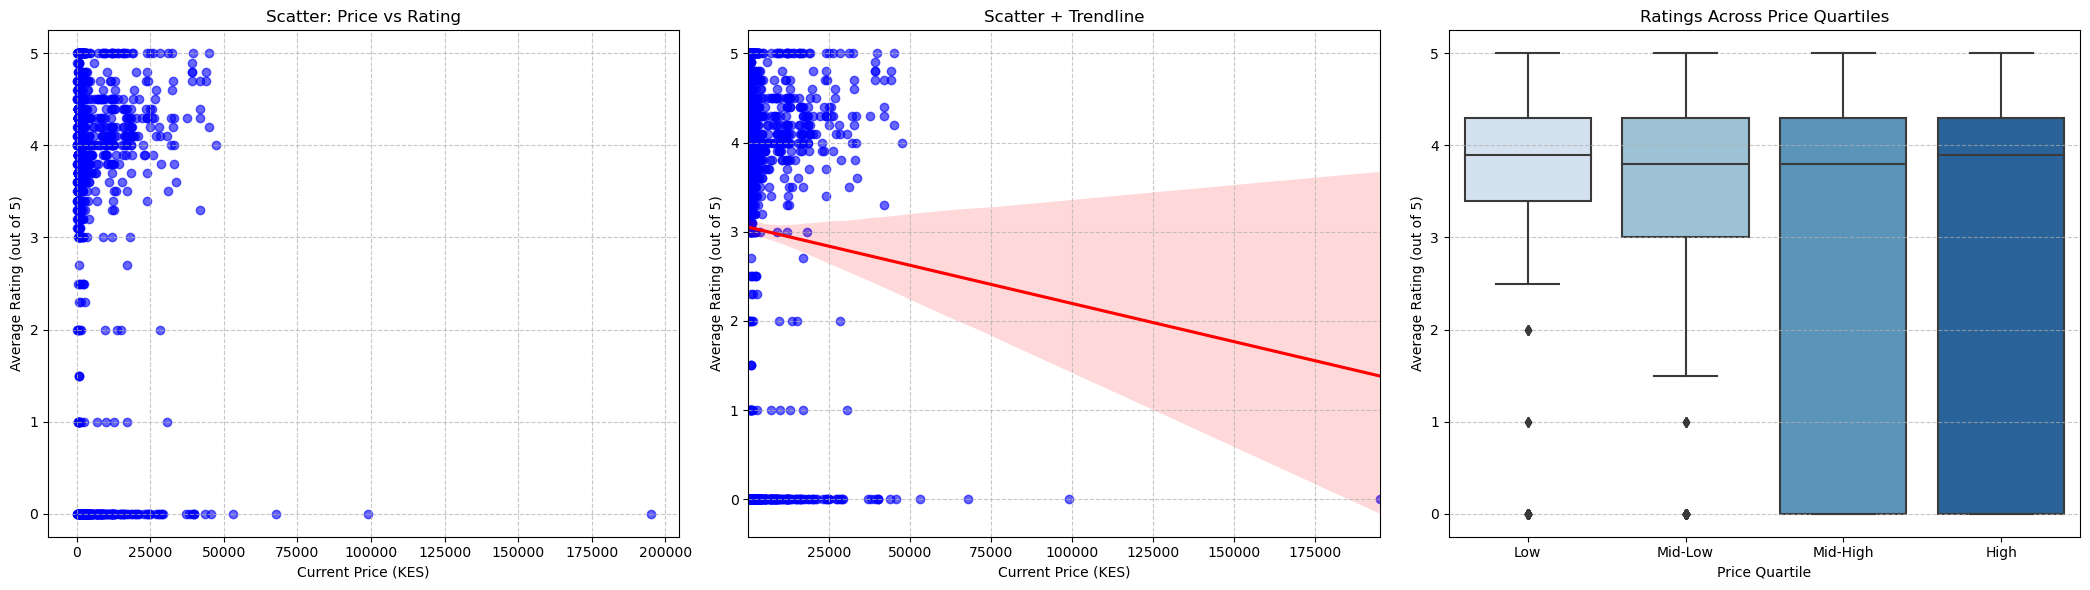

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Correlation ---
correlation = data["current_price"].corr(data["rating_number"])
print(f"Correlation between price and rating: {correlation:.2f}")

# --- Create price quartiles ---
data["price_quartile"] = pd.qcut(
    data["current_price"], 
    q=4, 
    labels=["Low", "Mid-Low", "Mid-High", "High"]
)

# --- Setup subplots (3 side by side) ---
fig, axes = plt.subplots(1, 3, figsize=(21,6))

# 1️⃣ Scatter only all products
axes[0].scatter(data["current_price"], data["rating_number"], alpha=0.6, color="blue")
axes[0].set_title("Scatter: Price vs Rating")
axes[0].set_xlabel("Current Price (KES)")
axes[0].set_ylabel("Average Rating (out of 5)")
axes[0].grid(True, linestyle="--", alpha=0.7)

# 2️⃣ Scatter + Regression Line
sns.regplot(
    x="current_price", 
    y="rating_number", 
    data=data, 
    scatter_kws={"alpha":0.6, "color":"blue"}, 
    line_kws={"color":"red"},
    ax=axes[1]
)
axes[1].set_title("Scatter + Trendline")
axes[1].set_xlabel("Current Price (KES)")
axes[1].set_ylabel("Average Rating (out of 5)")
axes[1].grid(True, linestyle="--", alpha=0.7)

# 3️⃣ Boxplot by Price Quartiles
sns.boxplot(
    x="price_quartile", 
    y="rating_number", 
    data=data, 
    palette="Blues", 
    ax=axes[2]
)
axes[2].set_title("Ratings Across Price Quartiles")
axes[2].set_xlabel("Price Quartile")
axes[2].set_ylabel("Average Rating (out of 5)")
axes[2].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()




## Findings: Price vs Ratings

* The **correlation is near zero (\~-0.04)**, showing that **price and ratings have almost no meaningful relationship** in our dataset.
* **Premium products** (e.g., smartphones) do earn solid ratings, but this isn’t consistent enough to prove that higher prices guarantee better reviews.
* **Budget products** (like fashion items) also perform well in ratings, proving that affordability and value-for-money matter just as much as price.
* **Mid-range items** still hover around average ratings, suggesting that shoppers can be more critical in this tier.

The scatter showed **no clear upward or downward trend** → ratings are spread across all price points, meaning customers do not base their satisfaction primarily on price. From our data set, 5-star products cluster more in the **mid and lower price ranges** rather than at the very top. Premium products can get good ratings, but affordable items often achieve 5 stars too, since buyers love value-for-money.

---

## Recommendations

* **Do not rely on pricing alone** as a driver for higher ratings — quality, durability, and user experience matter more.
* **Invest in product quality and customer service** across all tiers, as both budget and premium buyers reward value-for-money.
* **Highlight customer value in marketing** for affordable and mid-range items, since they have strong potential to earn top ratings.
* **For premium products**, focus on showcasing unique features and after-sales support, which could justify higher prices and improve satisfaction.

---

## Conclusion

The analysis shows that **price has little to no influence on customer ratings**. While higher-end products can receive good reviews, **affordable and mid-range items are just as likely to achieve 5-star ratings** when they deliver strong value. This suggests that to boost customer satisfaction and ratings, the company should prioritize **quality, perceived value, and customer experience** over pricing strategies alone.

---